# KAIM Week 1 Challenge Task 2

## Business Objective

**Nova Financial Solutions** aims to enhance its predictive analytics capabilities to significantly boost its financial forecasting accuracy and operational efficiency through advanced data analysis. As a Data Analyst at Nova Financial Solutions,  your primary task is to conduct a rigorous analysis of the financial news dataset. The focus of your analysis should be two-fold:

*     **Sentiment Analysis:** Perform sentiment analysis on the ‘headline’ text to quantify the tone and sentiment expressed in financial news. This will involve using natural language processing (NLP) techniques to derive sentiment scores, which can be associated with the respective 'Stock Symbol' to understand the emotional context surrounding stock-related news.
*     **Correlation Analysis:** Establish statistical correlations between the sentiment derived from news articles and the corresponding stock price movements. This involves tracking stock price changes around the date the article was published and analyzing the impact of news sentiment on stock performance. This analysis should consider the publication date and potentially the time the article was published if such data can be inferred or is available.

Your recommendations should leverage insights from this sentiment analysis to suggest investment strategies. These strategies should utilize the relationship between news sentiment and stock price fluctuations to predict future movements. The final report should provide clear, actionable insights based on your analysis, offering innovative strategies to use news sentiment as a predictive tool for stock market trends.


## Dataset Overview

### Financial News and Stock Price Integration Dataset

**FNSPID (Financial News and Stock Price Integration Dataset)**, is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

- The structure of the [data](https://drive.google.com/file/d/1tLHusoOQOm1cU_7DtLNbykgFgJ_piIpd/view?usp=drive_link) is as follows
    - `headline`: Article release headline, the title of the news article, which often includes key financial actions like stocks hitting highs, price target changes, or company earnings.
    - `url`: The direct link to the full news article.
    - `publisher`: Author/creator of article.
    - `date`: The publication date and time, including timezone information(UTC-4 timezone).
    - `stock`: Stock ticker symbol (unique series of letters assigned to a publicly traded company). For example (AAPL: Apple)


### Deliverables and Tasks to be Done

#### Quantitative analysis using pynance and TaLib

**Tasks:**
- Use additional finance data
- Load and prepare the data.
- Load your stock price data into a pandas DataFrame. Ensure your data includes columns like Open, High, Low, Close, and Volume.	
- Apply Analysis Indicators with TA-Lib
    - You can use TA-Lib to calculate various technical indicators such as moving averages, RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence)
- Use PyNance for Financial Metrics
- Visualize the Data
    - Create visualizations to better understand the data and the impact of different indicators on the stock price.

**KPIs**
- Proactivity to self-learn - sharing references.
- Accuracy of indicators
- Completeness of Data Analysis

### Minimum Essential To Do:

- Merge the necessary branches from task-1 into the main branch using a Pull Request (PR)
- Create at least one new branch called "task-2" for the ongoing development of the dashboard.
- Commit your work with a descriptive commit message.
- Prepare Your Data
- Calculate Basic Technical Indicators
- Visualize Data


In [13]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218910 sha256=520a7107349fff0db00cbe1fb1101f951a9457a64a7dfa44d134d1016fcade5f
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_ta as ta

%matplotlib inline

In [46]:
apple = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/AAPL_historical_data.csv'
amazon = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/AMZN_historical_data.csv'
google = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/GOOG_historical_data.csv'
meta = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/META_historical_data.csv'
microsoft = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/MSFT_historical_data.csv'
nividia = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/NVDA_historical_data.csv'
tesla = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/TSLA_historical_data.csv'

In [59]:
apple = pd.read_csv(apple)
amazon = pd.read_csv(amazon)
google = pd.read_csv(google)
meta = pd.read_csv(meta)
microsoft = pd.read_csv(microsoft)
nividia = pd.read_csv(nividia)
tesla = pd.read_csv(tesla)

In [61]:
amazon.shape, google.shape, meta.shape, microsoft.shape, nividia.shape, tesla.shape

((6846, 9), (5020, 9), (2926, 9), (9672, 9), (6421, 9), (3545, 9))

In [62]:
data = amazon
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [48]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6846.000000,6846.000000,6846.000000,6846.000000,6846.000000,6.846000e+03,6846.0,6846.000000
mean,37.360464,37.801009,36.882561,37.351096,37.351096,1.380713e+08,0.0,0.003944
std,53.756955,54.366449,53.087051,53.729913,53.729913,1.382346e+08,0.0,0.246789
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,0.0,0.000000
25%,2.070125,2.120625,2.040156,2.076750,2.076750,6.505442e+07,0.0,0.000000
50%,8.574500,8.666750,8.466500,8.591500,8.591500,1.020650e+08,0.0,0.000000
75%,50.453876,50.723249,50.059875,50.426500,50.426500,1.567560e+08,0.0,0.000000
max,200.089996,201.199997,199.050003,200.000000,200.000000,2.086584e+09,0.0,20.000000


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


In [50]:
data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [51]:
data.duplicated().sum()

0

In [52]:
data.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [53]:
# Convert date column to datetime if necessary
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [54]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999921,0.999904,0.999805,0.999805,-0.297579,NaN,0.016639
High,0.999921,1.000000,0.999885,0.999908,0.999908,-0.296579,NaN,0.017159
Low,0.999904,0.999885,1.000000,0.999914,0.999914,-0.298666,NaN,0.016668
Close,0.999805,0.999908,0.999914,1.000000,1.000000,-0.297628,NaN,0.016564
Adj Close,0.999805,0.999908,0.999914,1.000000,1.000000,-0.297628,NaN,0.016564
Volume,-0.297579,-0.296579,-0.298666,-0.297628,-0.297628,1.000000,NaN,0.016065
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,0.016639,0.017159,0.016668,0.016564,0.016564,0.016065,NaN,1.000000


#### **Calculate Basic Technical Indicators**

### Relative Strength Index (RSI)
The **Relative Strength Index (RSI)** is a tool used in trading to measure how fast and strong a price is moving. It's like a speedometer for prices, showing whether something (like a stock) is being bought or sold too much.

- **How it works**: RSI looks at the recent price changes over a certain period, usually 14 days. It compares the average gains (when the price goes up) to the average losses (when the price goes down).

- **Reading RSI**: The RSI value ranges from 0 to 100. 
  - **Above 70**: The asset might be overbought, meaning it's been bought a lot and could be due for a price drop.
  - **Below 30**: The asset might be oversold, meaning it's been sold a lot and could be due for a price increase.

### Moving Average Convergence Divergence (MACD)
The **Moving Average Convergence Divergence (MACD)** is another tool traders use to understand the momentum of a price, or how strong a trend is. It helps traders see changes in the strength, direction, and duration of a trend.

- **How it works**: The MACD is based on two moving averages, which are like smoothed-out versions of the price:
  1. **Fast Moving Average (Shorter Period)**: Reacts quickly to recent price changes.
  2. **Slow Moving Average (Longer Period)**: Reacts more slowly to price changes.

  The MACD line is the difference between these two moving averages. There's also a **Signal Line**, which is a moving average of the MACD line itself.

- **Reading MACD**:
  - When the **MACD line crosses above the Signal Line**, it might be a good time to buy (bullish signal).
  - When the **MACD line crosses below the Signal Line**, it might be a good time to sell (bearish signal).
  - If the lines are far apart, it shows strong momentum; if they're close, it shows weak momentum.

In [64]:
# Calculate Moving Averages
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_200'] = ta.sma(data['Close'], length=200)

# Calculate RSI (Relative Strength Index)
data['RSI'] = ta.rsi(data['Close'], length=14)

# Calculate MACD (Moving Average Convergence Divergence)
macd = ta.macd(data['Close'], fast=12, slow=26, signal=9)
data['MACD'] = macd['MACD_12_26_9']
data['MACD_signal'] = macd['MACDs_12_26_9']
data['MACD_hist'] = macd['MACDh_12_26_9']

# Check the first few rows with new columns
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_50,SMA_200,RSI,MACD,MACD_signal,MACD_hist
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
len(data['MACD'].unique())

6822

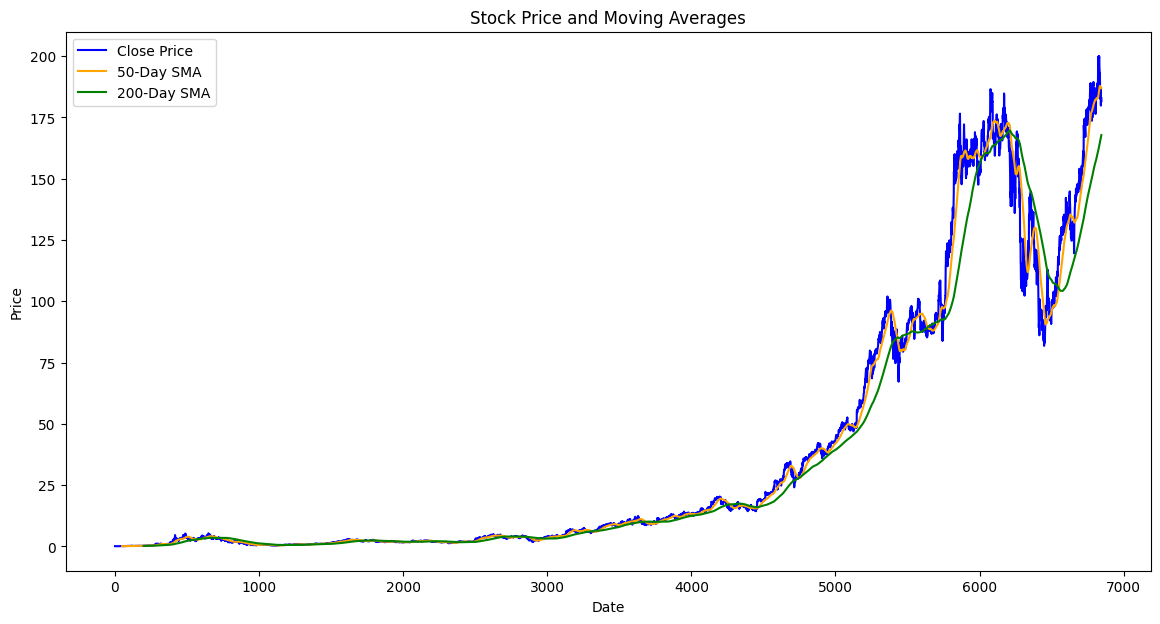

In [67]:
# Plot Closing Price and Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data['SMA_200'], label='200-Day SMA', color='green')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig('Stock_price_moving_average.png')
plt.show()

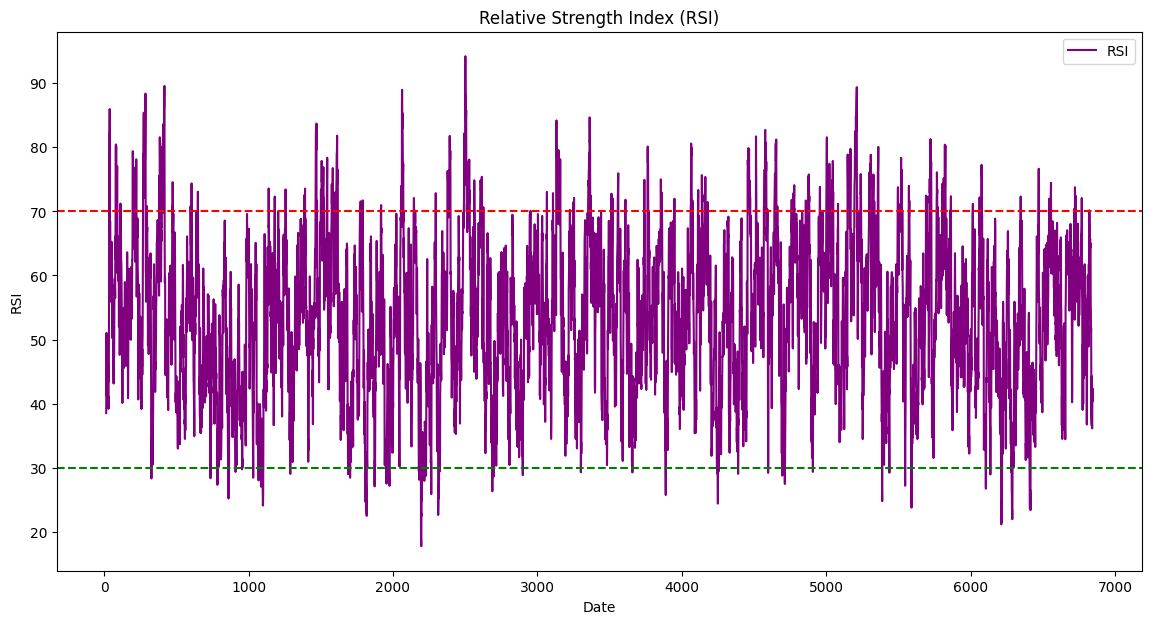

In [68]:
# Plot RSI
plt.figure(figsize=(14, 7))
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.savefig('relative_strength_index.png')
plt.show()


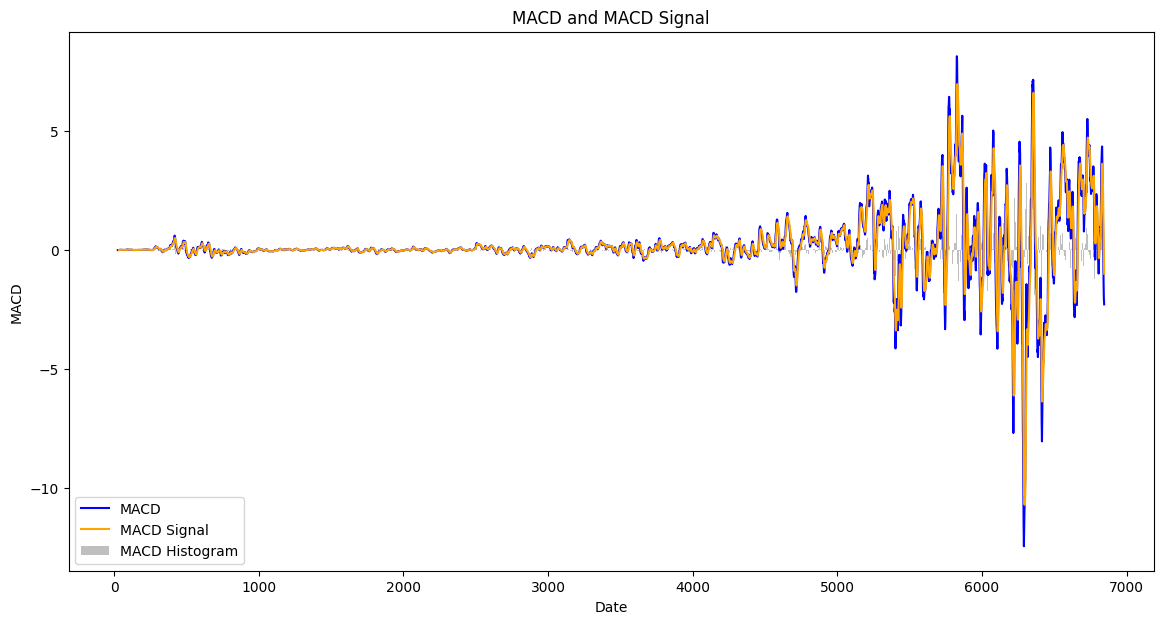

In [69]:
# Plot MACD
plt.figure(figsize=(14, 7))
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_signal'], label='MACD Signal', color='orange')
plt.bar(data.index, data['MACD_hist'], label='MACD Histogram', color='grey', alpha=0.5)
plt.title('MACD and MACD Signal')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.savefig('macd_signals.png')
plt.show()